# PREGUNTA 02



## TASK 01


In [60]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [54]:
df = pd.read_csv('IPRESS.csv',encoding='latin1')


In [55]:
# 2) Filtrar condición EN FUNCIONAMIENTO
df = df[df["Condición"] == "EN FUNCIONAMIENTO"]

# 3) Eliminar filas sin coordenadas
df = df.dropna(subset=["NORTE", "ESTE"])             # elimina NaN
df = df[(df["NORTE"] != "") & (df["ESTE"] != "")]    # elimina vacíos

# 4) Convertir a numérico
df["NORTE"] = pd.to_numeric(df["NORTE"], errors="coerce")
df["ESTE"]  = pd.to_numeric(df["ESTE"], errors="coerce")

# 5) Volver a limpiar si quedó algún NaN
df = df.dropna(subset=["NORTE", "ESTE"])

# 6) Renombrar columnas
df = df.rename(columns={"NORTE": "longitud", "ESTE": "latitud"})


In [98]:
df

,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,Dirección,...,Inicio de Actividad,Director Médico y/o Responsable de la Atención de Salud,Estado,Situación,Condición,Inspección,longitud,latitud,COTA,CAMAS
1,GOBIERNO REGIONAL,7050,AMBATO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,CAJAMARCA,CUTERVO,SANTA CRUZ,060611,COMUNIDAD DE AMBATO,...,29/06/2006,IDELSO MENOR CHAVEZ,ACTIVADO,,EN FUNCIONAMIENTO,,-78.858380,-6.133523,1724.0,NaN
2,GOBIERNO REGIONAL,99,SANTA ISABEL DE YUMBATURO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LORETO,LORETO,PARINARI,160302,ACTUALIZAR,...,01/01/1900,JULIO TONY CAITIMARI MACHOA,ACTIVADO,,EN FUNCIONAMIENTO,,-74.258139,-4.581509,124.0,NaN
6,MINSA,7278,PUESTO DE SALUD HEROES DEL CENEPA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,VILLA EL SALVADOR,150142,"JR. HEROES DEL CENEPA MZ C LT 20, ALT DE PANAM...",...,01/02/2008,BASTIDAS CAMARENA HUBERT ALEX . .,ACTIVADO,,EN FUNCIONAMIENTO,,-76.930608,-12.248699,NaN,NaN
12,GOBIERNO REGIONAL,5460,NUEVA BETANIA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,OTROS CC.NN. NUEVA BETANIA S/N NÚMERO S/N DIST...,...,20/12/2000,MARIANA VASQUEZ PINEDO,ACTIVADO,,EN FUNCIONAMIENTO,,-74.296531,-8.398366,177.0,NaN
15,GOBIERNO REGIONAL,6431,PONGO ISLA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,SAN MARTIN,SAN MARTIN,HUIMBAYOC,220907,OTROS CP PONGO ISLA DISTRITO HUIMBAYOC PROVINC...,...,14/09/2001,MIRLANDA MOZOMBITE BARDALES,ACTIVADO,,EN FUNCIONAMIENTO,,-75.885812,-6.438298,172.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20814,GOBIERNO REGIONAL,2283,P.S NUEVO HUALAPAMPA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,HUANCABAMBA,HUARMACA,200304,CENTRO POBLADO NUEVO HUALAPAMPA S/N,...,01/01/1900,NaN,ACTIVADO,,EN FUNCIONAMIENTO,,-79.437187,-5.789407,1364.0,NaN
20815,GOBIERNO REGIONAL,2278,P.S SAN MARTIN DE CONGOÑA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,HUANCABAMBA,HUARMACA,200304,CENTRO POBLADO SAN MARTIN DE CONGOÑA S/N,...,01/01/1900,NaN,ACTIVADO,,EN FUNCIONAMIENTO,,-79.627953,-5.644592,1320.0,NaN
20816,GOBIERNO REGIONAL,2274,P.S TUNAS,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,HUANCABAMBA,HUARMACA,200304,CENTRO POBLADO TUNAS,...,01/01/1900,NaN,ACTIVADO,,EN FUNCIONAMIENTO,,-79.546778,-5.498508,1549.0,NaN
20817,GOBIERNO REGIONAL,2272,C.S LIMON DE PORCUYA,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,HUANCABAMBA,HUARMACA,200304,CENTRO POBLADO LIMON DE PORCUYA,...,01/01/1900,NaN,ACTIVADO,,EN FUNCIONAMIENTO,,-79.537903,-5.889830,1612.0,NaN


In [103]:
tabla=df.groupby("Distrito").size().reset_index(name="Total_Hospitales_Distrito")
tabla.sort_values(by="Total_Hospitales_Distrito", ascending=False, inplace=True)
sub = tabla.head(20)

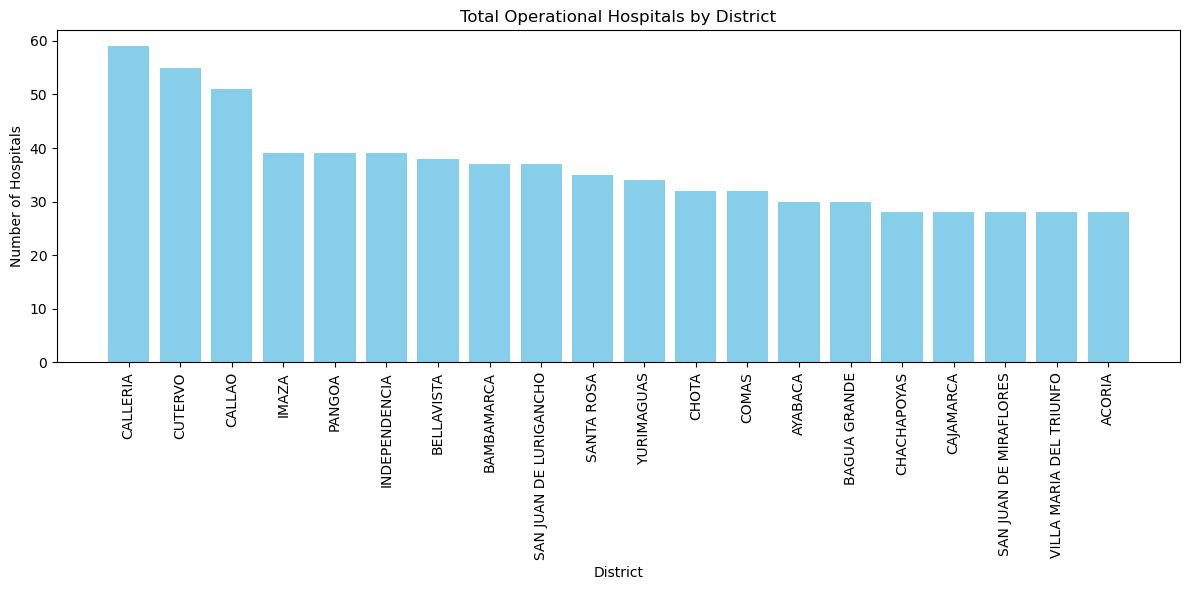

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(sub["Distrito"], sub["Total_Hospitales_Distrito"], color="skyblue")
plt.xticks(rotation=90)
plt.title("Total Operational Hospitals by District")
plt.xlabel("District")
plt.ylabel("Number of Hospitals")
plt.tight_layout()
plt.show()

In [105]:
plt.savefig("D:\TASK 2\Total Operational Hospitals by District.png", dpi=300)  # Guarda la figura

<Figure size 640x480 with 0 Axes>

In [56]:
df["UBIGEO"] = df["UBIGEO"].astype(str).str.zfill(6)
# GeoDataFrame de puntos
gdf_pts = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["longitud"], df["latitud"]),
    crs="EPSG:4326"
)

In [57]:
# Load the district shapefile of Peru
districts = gpd.read_file("D:\TASK 2\shape_file\DISTRITOS.shp")
# Ajusta esta variable si tu shape usa otro nombre para UBIGEO distrital
clave_poly = "IDDIST"   # por ejemplo "UBIGEO", "IDDIST", etc.

if districts.crs is None:
    districts = districts.set_crs("EPSG:4326")
else:
    districts = districts.to_crs("EPSG:4326")

if clave_poly not in districts.columns:
    raise ValueError(f"Tu shapefile no tiene la columna '{clave_poly}'. Reemplaza 'clave_poly' por el nombre correcto.")

districts[clave_poly] = districts[clave_poly].astype(str).str.zfill(6)

In [58]:
# ==========================
# 3) Conteo por distrito
# ==========================

conteo = (gdf_pts.groupby("UBIGEO")
                .size()
                .reset_index(name="Total_Hospitales"))

# Une al shape
gdf_plot = districts.merge(conteo, left_on=clave_poly, right_on="UBIGEO", how="left")
gdf_plot["Total_Hospitales"] = gdf_plot["Total_Hospitales"].fillna(0).astype(int)


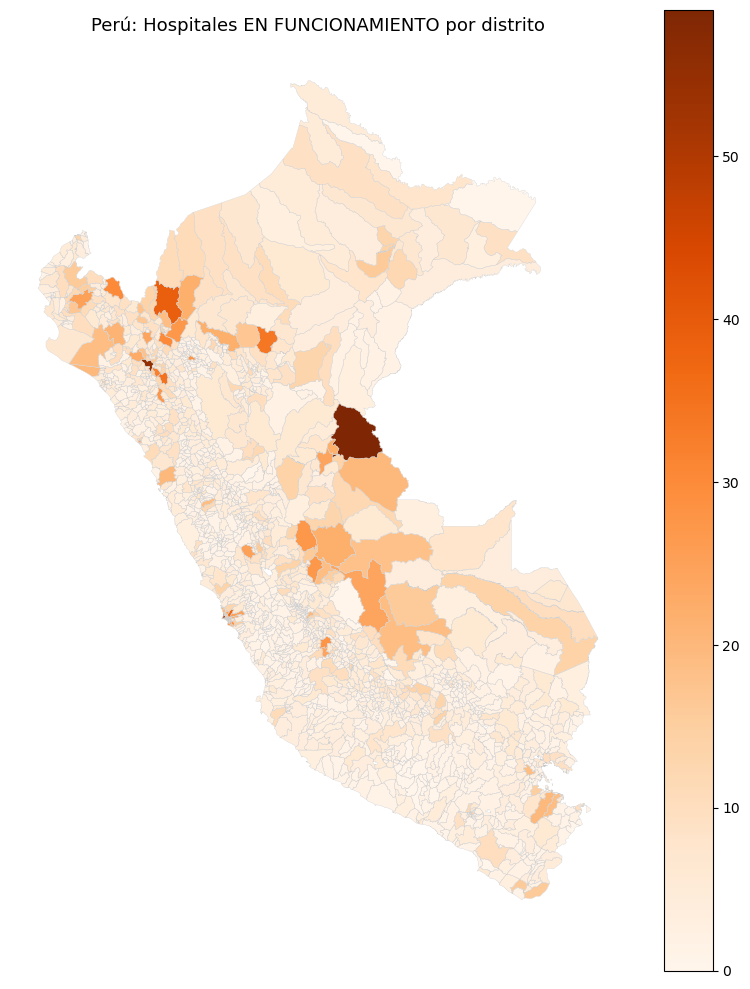

In [71]:
fig, ax = plt.subplots(figsize=(8, 10))
# Bordes grises suaves
districts.boundary.plot(ax=ax, color="#c9c9c9", linewidth=0.2)

gdf_plot.plot(
    ax=ax,
    column="Total_Hospitales",
    cmap="Oranges",
    k=7,
    linewidth=0.15,
    edgecolor="white",
    legend=True
)


ax.set_title("Perú: Hospitales EN FUNCIONAMIENTO por distrito", fontsize=13)
ax.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
fig.savefig("D:\TASK 2\Hospitales EN FUNCIONAMIENTO por distrito.png", dpi=300, bbox_inches="tight")

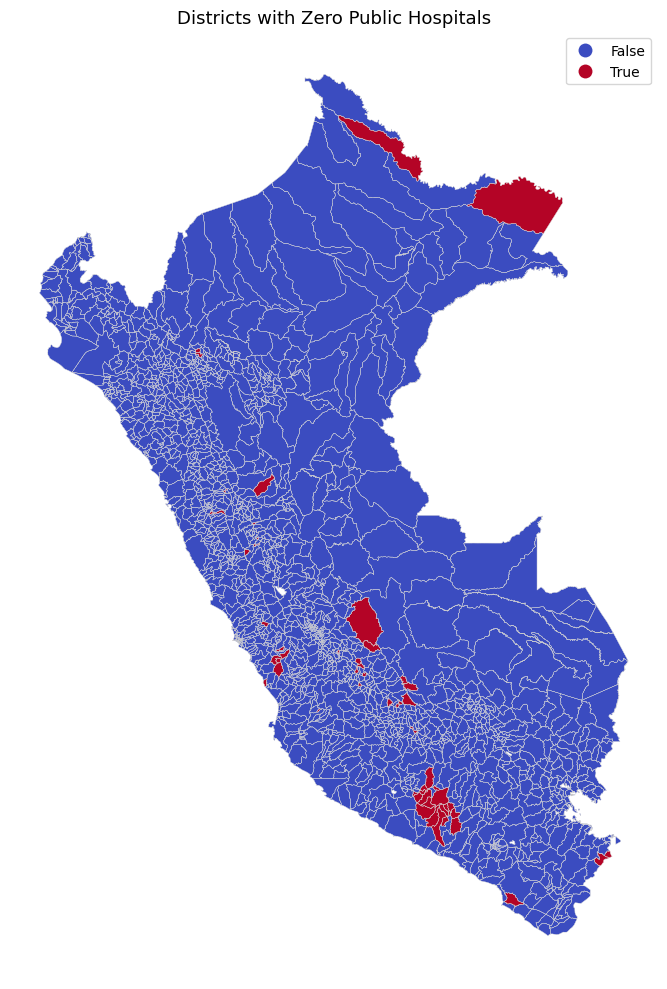

In [72]:
# Map 2: Highlight districts with zero hospitals
fig, ax = plt.subplots(figsize=(12, 10))
districts.boundary.plot(ax=ax, color="#c9c9c9", linewidth=0.2)

gdf_plot["zero_hospitals"] = gdf_plot["Total_Hospitales"] == 0
gdf_plot.plot(column="zero_hospitals", 
              ax=ax, legend=True, 
              cmap="coolwarm", 
              linewidth=0.15,
              edgecolor="white")
ax.set_title("Districts with Zero Public Hospitals", fontsize=13)
plt.axis("off")
plt.tight_layout()
plt.show()

In [73]:
fig.savefig("D:\TASK 2\Districts with Zero Public Hospitals.png", dpi=300, bbox_inches="tight")

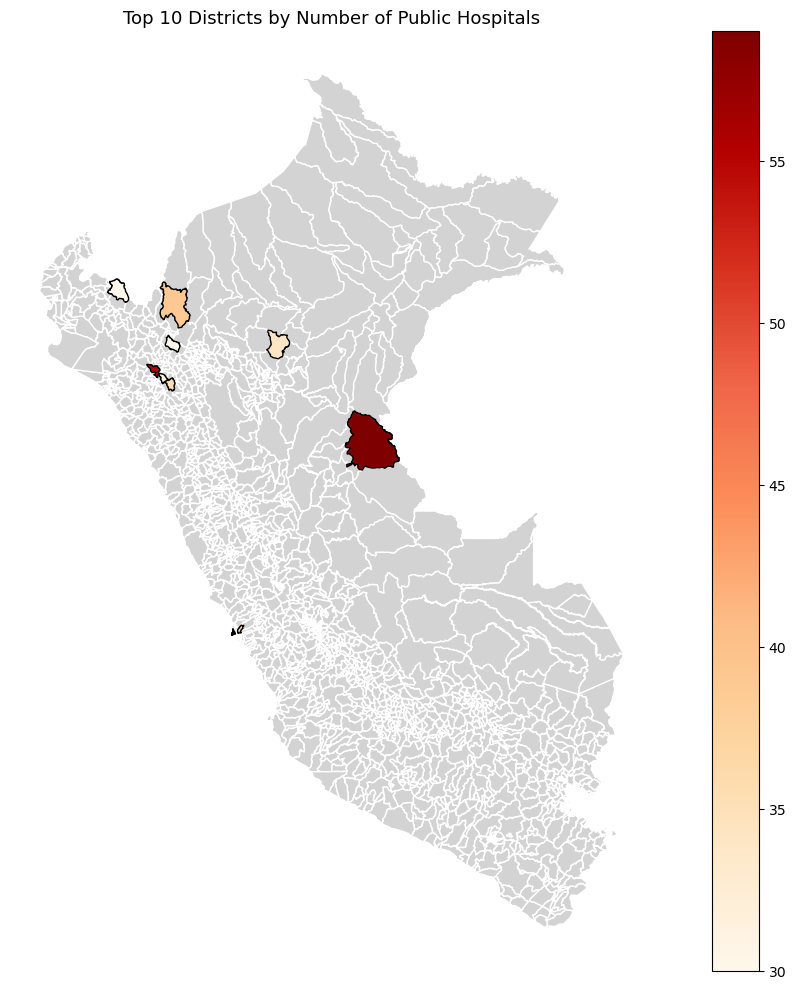

In [74]:
# Map 3: Top 10 districts with the highest number of hospitals
top10 = gdf_plot.nlargest(10, "Total_Hospitales")
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
districts.plot(ax=ax, color="lightgrey", edgecolor="white")
top10.plot(column="Total_Hospitales", ax=ax, legend=True, cmap="OrRd", edgecolor="black")
ax.set_title("Top 10 Districts by Number of Public Hospitals", fontsize=13)
plt.axis("off")
plt.tight_layout()
plt.show()

In [75]:
fig.savefig("D:\TASK 2\Top 10 Districts by Number of Public Hospitals.png", dpi=300, bbox_inches="tight")

## TASK 2


In [76]:
# Aggregate hospital counts at the department level
dept_hospitals = (
    gdf_plot.groupby("DEPARTAMEN")["Total_Hospitales"]
    .sum()
    .reset_index(name="Total_Hospitales_Departamento")
)

In [78]:
# Identify departments with highest and lowest hospital counts
dept_sorted = dept_hospitals.sort_values("Total_Hospitales_Departamento", ascending=False)
dept_max = dept_sorted.iloc[0]
dept_min = dept_sorted.iloc[-1]


In [79]:
# Display summary table
print("Summary Table (Departments sorted by hospital count):")
print(dept_sorted)
dept_sorted.to_csv("D:\TASK 2\Department_Hospital_Summary.csv", index=False)

Summary Table (Departments sorted by hospital count):
       DEPARTAMEN  Total_Hospitales_Departamento
5       CAJAMARCA                            845
14           LIMA                            774
11          JUNIN                            445
19          PIURA                            442
0        AMAZONAS                            417
1          ANCASH                            416
20           PUNO                            407
4        AYACUCHO                            387
21     SAN MARTIN                            379
2        APURIMAC                            375
15         LORETO                            351
7           CUSCO                            339
12    LA LIBERTAD                            336
8    HUANCAVELICA                            325
9         HUANUCO                            261
18          PASCO                            258
24        UCAYALI                            234
3        AREQUIPA                            224
13     LAMBAYEQ

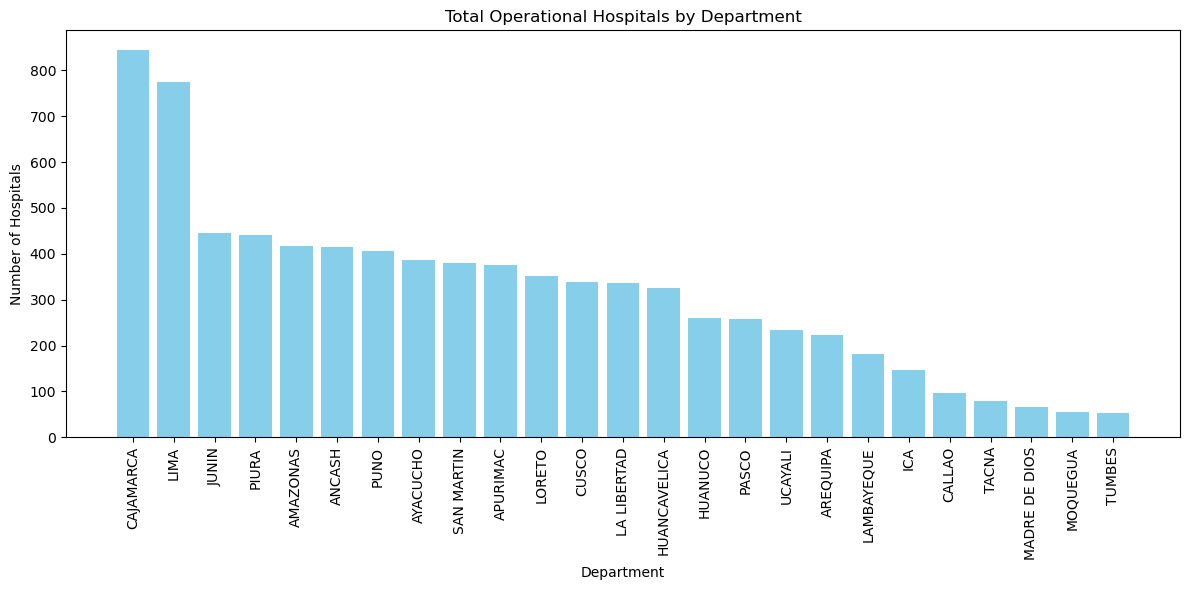

In [80]:
# Bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(dept_sorted["DEPARTAMEN"], dept_sorted["Total_Hospitales_Departamento"], color="skyblue")
plt.xticks(rotation=90)
plt.title("Total Operational Hospitals by Department")
plt.xlabel("Department")
plt.ylabel("Number of Hospitals")
plt.tight_layout()
plt.show()

In [82]:
plt.savefig("D:\TASK 2\Total Operational Hospitals by Department.png", dpi=300)  # Guarda la figura

<Figure size 640x480 with 0 Axes>

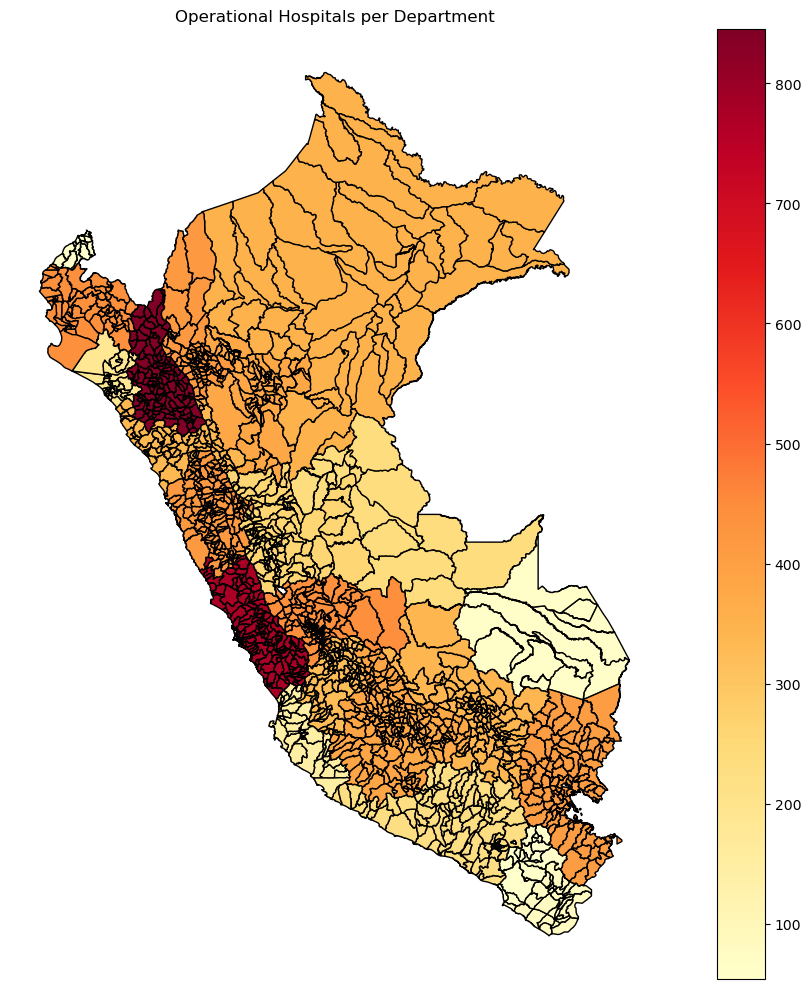

In [83]:

dept_map = pd.merge(gdf_plot,dept_hospitals, on="DEPARTAMEN", how="left")
dept_map["Total_Hospitales_Departamento"] = dept_map["Total_Hospitales_Departamento"].fillna(0)
fig, ax = plt.subplots(figsize=(12, 10))
dept_map.plot(column="Total_Hospitales_Departamento", ax=ax, legend=True, cmap="YlOrRd", edgecolor="black")
ax.set_title("Operational Hospitals per Department")
plt.axis("off")
plt.tight_layout()
plt.show()

In [84]:
fig.savefig("D:\TASK 2\Operational Hospitals per Department.png", dpi=300)

## TASK 03

In [85]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))

In [86]:
import folium
import pandas as pd
#from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet

import folium as fm
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap, StripePattern

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString


import branca as br 

In [87]:
# --- Task 3: Proximity Analysis (using Population Centers) ---

# 1. Load population centers shapefile (replace with your actual file path)
pop_centers = gpd.read_file("D:\TASK 2\CCPP_0\CCPP_IGN100K.shp")
# 2) Asegurar CRS
poblados  = pop_centers.to_crs("EPSG:4326")

# 3) Derivar UBIGEO (primeros 6 dígitos del campo CÓDIGO)
# Si el nombre del campo tiene tilde, puedes renombrarlo:
poblados = poblados.rename(columns={"CÓDIGO": "CODIGO"})
poblados["UBIGEO"] = poblados["CODIGO"].astype(str).str[:6].str.zfill(6)

# 4) Normalizar clave en distritos (usa la que tengas: IDDIST o UBIGEO)
clave_poly = "IDDIST"  # cámbiala a "UBIGEO" si ese es tu campo


In [88]:
# 2. Filter for Lima and Loreto regions
pop_lima = poblados[poblados["DEP"].str.upper() == "LIMA"].copy()
pop_loreto = poblados[poblados["DEP"].str.upper() == "LORETO"].copy()

In [89]:
# Reproyectar a UTM 18S
pop_lima_proj = pop_lima.to_crs(epsg=32718)

# Calcular centroides en coordenadas proyectadas
pop_lima_proj["computed_centroid"] = pop_lima_proj.geometry.centroid

# Si quieres volver a WGS84 (EPSG:4326) para mostrar en mapas como folium
pop_lima["computed_centroid"] = pop_lima_proj["computed_centroid"].to_crs(epsg=4326)

In [90]:
# Reproyectar a UTM 18S
pop_loreto_proj = pop_loreto.to_crs(epsg=32718)

# Calcular centroides en coordenadas proyectadas
pop_loreto_proj["computed_centroid"] = pop_loreto_proj.geometry.centroid

# Si quieres volver a WGS84 (EPSG:4326) para mostrar en mapas como folium
pop_loreto["computed_centroid"] = pop_loreto_proj["computed_centroid"].to_crs(epsg=4326)


In [91]:
def buffer_hospital_count(poblados, gdf_pts, buffer_km=10):
    # Ensure both are in the same projected CRS for distance calculation
    poblados_proj = poblados.to_crs(epsg=32718)  # UTM zone 18S (Peru)
    gdf_pts_proj = gdf_pts.to_crs(epsg=32718)
    # Create buffer and count hospitals within buffer
    poblados_proj["buffer"] = poblados_proj.geometry.buffer(buffer_km * 1000)
    poblados_proj["hospital_count"] = poblados_proj["buffer"].apply(
        lambda buf: gdf_pts_proj[gdf_pts_proj.geometry.within(buf)].shape[0]
    )
    # Merge buffer and hospital_count back to original CRS
    poblados["buffer"] = poblados_proj["buffer"].to_crs(epsg=4326)
    poblados["hospital_count"] = poblados_proj["hospital_count"]
    return poblados

# Calculate hospital counts for Lima and Loreto population centers
pop_lima = buffer_hospital_count(pop_lima, gdf_pts)
pop_loreto = buffer_hospital_count(pop_loreto, gdf_pts)

# Identify most isolated and most concentrated population centers per region
lima_min = pop_lima.loc[pop_lima["hospital_count"].idxmin()]
lima_max = pop_lima.loc[pop_lima["hospital_count"].idxmax()]
loreto_min = pop_loreto.loc[pop_loreto["hospital_count"].idxmin()]
loreto_max = pop_loreto.loc[pop_loreto["hospital_count"].idxmax()]

In [92]:
import folium

def plot_population_center_with_buffer(pop_center, gdf_pts, buffer_km=10):
    # Get centroid coordinates
    centroid = pop_center["computed_centroid"]
    centroid_coords = [centroid.y, centroid.x]

    # Create folium map centered at the population center
    m = folium.Map(location=centroid_coords, zoom_start=11, tiles="OpenStreetMap")

    # Add buffer (10 km) as a circle
    folium.Circle(
        location=centroid_coords,
        radius=buffer_km * 1000,
        color="blue",
        fill=True,
        fill_opacity=0.2,
        popup=f"{pop_center['NOM_POBLAD']} - 10 km buffer"
    ).add_to(m)

    # Add population center marker
    folium.Marker(
        location=centroid_coords,
        popup=f"Population Center: {pop_center['NOM_POBLAD']}",
        icon=folium.Icon(color="red", icon="home")
    ).add_to(m)

    # Find hospitals within buffer
    buffer_geom = pop_center["buffer"]
    # Filter hospitals inside buffer
    hospitals_in_buffer = gdf_pts[gdf_pts.geometry.within(buffer_geom)]

    # Add hospital markers
    for _, row in hospitals_in_buffer.iterrows():
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=row["Nombre del establecimiento"],
            icon=folium.Icon(color="green", icon="plus-sign")
        ).add_to(m)

    return m

# Example usage:
# map_lima_isolated = plot_population_center_with_buffer(lima_min, gdf_pts, buffer_km=10)
# map_lima_isolated

In [95]:
# Lima (UTM 18S)
map_lima_concentration = plot_population_center_with_buffer(lima_max, gdf_pts, buffer_km=10)
map_lima_concentration.save("D:\TASK 2\lima_concentration.html")


# Loreto (UTM 19S)
# map_loreto_concentration = plot_population_center_with_buffer(loreto_max, hospitals_gdf, buffer_km=10, epsg_utm=32719)
# map_loreto_concentration


# PREGUNTA 03


## TASK 01


In [96]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# --- 0) Asegurar WGS84 y UBIGEO como string de 6 dígitos ---
gdf_plot = gdf_plot.to_crs(4326).copy()
gdf_plot["UBIGEO"] = gdf_plot["UBIGEO"].astype(str).str.zfill(6)

gdf_pts = gdf_pts.to_crs(4326).copy()

# (Si NO tienes conteo por distrito aún) calcular Total_Hospitales por UBIGEO:
if "Total_Hospitales" not in gdf_plot.columns:
    if "UBIGEO" in gdf_pts.columns:
        hosp_counts = gdf_pts.groupby("UBIGEO").size().rename("Total_Hospitales").reset_index()
    else:
        # Asigna UBIGEO a cada hospital via spatial join con distritos (por si no la trae)
        # Si tu versión de GeoPandas no tiene predicate, puedes omitir el arg.
        gdf_pts = gpd.sjoin(gdf_pts, gdf_plot[["UBIGEO","geometry"]], how="left", predicate="within")
        hosp_counts = gdf_pts.groupby("UBIGEO").size().rename("Total_Hospitales").reset_index()

    gdf_plot = gdf_plot.merge(hosp_counts, on="UBIGEO", how="left")

# Rellenar NaN con 0
gdf_plot["Total_Hospitales"] = gdf_plot["Total_Hospitales"].fillna(0).astype(int)

# --- 1) Crear mapa base centrado en Perú ---
m_national = folium.Map(location=[-9.19, -75.015], zoom_start=5, tiles="CartoDB positron")

# --- 2) Coropleta: hospitales por distrito ---
folium.Choropleth(
    geo_data=gdf_plot.to_json(),         # usar to_json evita problemas de serialización
    data=gdf_plot[["UBIGEO","Total_Hospitales"]],
    columns=["UBIGEO", "Total_Hospitales"],
    key_on="feature.properties.UBIGEO",
    fill_color="YlOrRd",
    fill_opacity=0.75,
    line_opacity=0.3,
    nan_fill_color="#f0f0f0",
    legend_name="Hospitales por distrito"
).add_to(m_national)

# Tooltip bonito sobre distritos (si tienes nombres, ajusta las columnas)
folium.GeoJson(
    gdf_plot,
    name="Distritos",
    style_function=lambda x: {"fillOpacity":0, "color":"#00000000", "weight":0.1},
    tooltip=folium.GeoJsonTooltip(
        fields=["UBIGEO","Total_Hospitales"],
        aliases=["UBIGEO:", "Total hospitales:"],
        localize=True,
        sticky=False
    )
).add_to(m_national)

# --- 3) Cluster de marcadores con todos los hospitales ---
marker_cluster = MarkerCluster(name="Hospitales").add_to(m_national)
for _, row in gdf_pts.iterrows():
    nombre = row.get("Nombre del establecimiento", "Hospital")
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],  # lat, lon
        popup=nombre,
        tooltip=nombre,
        icon=folium.Icon(color="green", icon="plus", prefix="fa")
    ).add_to(marker_cluster)

# --- 4) Controles y salida ---
folium.LayerControl(collapsed=False).add_to(m_national)

m_national.save("mapa_nacional_hospitales.html")


## Task 02

In [48]:
from IPython.display import display, Markdown
# Reusar el mapa nacional creado antes
m_national_1 = folium.Map(location=[-9.19, -75.015], zoom_start=5, tiles="CartoDB positron")
# Task 2: Proximity Visualization — Lima & Loreto

# Add circles for Lima
folium.Circle(
    location=[lima_min["computed_centroid"].y, lima_min["computed_centroid"].x],
    radius=10000,
    color="red",
    fill=True,
    fill_opacity=0.3,
    popup=f"{lima_min['NOM_POBLAD']}: {lima_min['hospital_count']} hospitals within 10 km",
    tooltip=f"{lima_min['NOM_POBLAD']} (Isolated, {lima_min['hospital_count']} hospitals)"
).add_to(m_national_1)

folium.Circle(
    location=[lima_max["computed_centroid"].y, lima_max["computed_centroid"].x],
    radius=10000,
    color="green",
    fill=True,
    fill_opacity=0.3,
    popup=f"{lima_max['NOM_POBLAD']}: {lima_max['hospital_count']} hospitals within 10 km",
    tooltip=f"{lima_max['NOM_POBLAD']} (Concentrated, {lima_max['hospital_count']} hospitals)"
).add_to(m_national_1)

# Add circles for Loreto
folium.Circle(
    location=[loreto_min["computed_centroid"].y, loreto_min["computed_centroid"].x],
    radius=10000,
    color="red",
    fill=True,
    fill_opacity=0.3,
    popup=f"{loreto_min['NOM_POBLAD']}: {loreto_min['hospital_count']} hospitals within 10 km",
    tooltip=f"{loreto_min['NOM_POBLAD']} (Isolated, {loreto_min['hospital_count']} hospitals)"
).add_to(m_national_1)

folium.Circle(
    location=[loreto_max["computed_centroid"].y, loreto_max["computed_centroid"].x],
    radius=10000,
    color="green",
    fill=True,
    fill_opacity=0.3,
    popup=f"{loreto_max['NOM_POBLAD']}: {loreto_max['hospital_count']} hospitals within 10 km",
    tooltip=f"{loreto_max['NOM_POBLAD']} (Concentrated, {loreto_max['hospital_count']} hospitals)"
).add_to(m_national_1)

# Short written analysis:

analysis_text = """
**Analysis**

- **Lima:** The most concentrated population center is located in urban Lima, where hospital density is highest, reflecting strong accessibility and urban clustering of health services. The most isolated center, while still within Lima, has fewer hospitals nearby, but overall accessibility remains high due to urban infrastructure.

- **Loreto:** The most isolated population center in Loreto highlights the geographic dispersion typical of the Amazon region, with significant challenges in hospital accessibility due to remoteness and limited infrastructure. The most concentrated center, though better served, still faces accessibility constraints compared to Lima.
"""
display(Markdown(analysis_text))


**Analysis**

- **Lima:** The most concentrated population center is located in urban Lima, where hospital density is highest, reflecting strong accessibility and urban clustering of health services. The most isolated center, while still within Lima, has fewer hospitals nearby, but overall accessibility remains high due to urban infrastructure.

- **Loreto:** The most isolated population center in Loreto highlights the geographic dispersion typical of the Amazon region, with significant challenges in hospital accessibility due to remoteness and limited infrastructure. The most concentrated center, though better served, still faces accessibility constraints compared to Lima.


In [52]:
m_national_1

In [ ]:
m_national_1.save("3.2_mapa_nacional_hospitales_proximity.html")